In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.structured import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

/home/eclipse/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
PATH = '../datafiles/titanic'

In [5]:
!ls {PATH}

test.csv  train.csv


In [6]:
train_df_raw = pd.read_csv(f'{PATH}/train.csv', sep=',', low_memory=False)
test_df_raw = pd.read_csv(f'{PATH}/test.csv', sep=',')

In [7]:
def shape(dataframe):
    return print('Dataset shape :\n{}'.format(dataframe.shape))

def display_transpose(dataframe):
    pd.option_context('display.max_rows' ,1000, 'display.max_columns', 1000)
    return display(dataframe.transpose())

In [8]:
train_df_raw[:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
#transposed view of the dataset
display_transpose(train_df_raw[:20])

shape(train_df_raw)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
PassengerId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Survived,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1
Pclass,3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)","Sandstrom, Miss. Marguerite Rut","Bonnell, Miss. Elizabeth","Saundercock, Mr. William Henry","Andersson, Mr. Anders Johan","Vestrom, Miss. Hulda Amanda Adolfina","Hewlett, Mrs. (Mary D Kingcome)","Rice, Master. Eugene","Williams, Mr. Charles Eugene","Vander Planke, Mrs. Julius (Emelia Maria Vande...","Masselmani, Mrs. Fatima"
Sex,male,female,female,female,male,male,male,male,female,female,female,female,male,male,female,female,male,male,female,female
Age,22,38,26,35,35,NaN,54,2,27,14,4,58,20,39,14,55,2,NaN,31,NaN
SibSp,1,1,0,1,0,0,0,3,0,1,1,0,0,1,0,0,4,0,1,0
Parch,0,0,0,0,0,0,0,1,2,0,1,0,0,5,0,0,1,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,PP 9549,113783,A/5. 2151,347082,350406,248706,382652,244373,345763,2649
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,16.7,26.55,8.05,31.275,7.8542,16,29.125,13,18,7.225


Dataset shape :
(891, 12)


male      577
female    314
Name: Sex, dtype: int64

Total passengers : 891


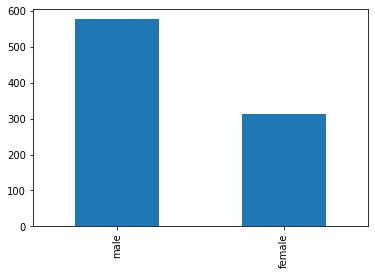

In [10]:
#The number of male and female passengers
display(train_df_raw.Sex.value_counts()),
print('Total passengers :',len(train_df_raw))
train_df_raw.Sex.value_counts().plot.bar()

0    549
1    342
Name: Survived, dtype: int64

(None,)

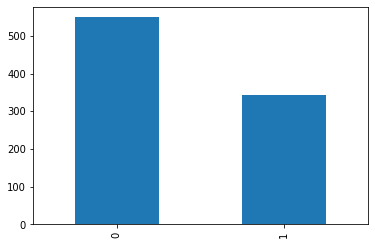

In [11]:
display(train_df_raw.Survived.value_counts())
display(train_df_raw.Survived.value_counts().plot.bar()),

In [12]:
#changing categorical varibles into numerics
train_cats(train_df_raw)

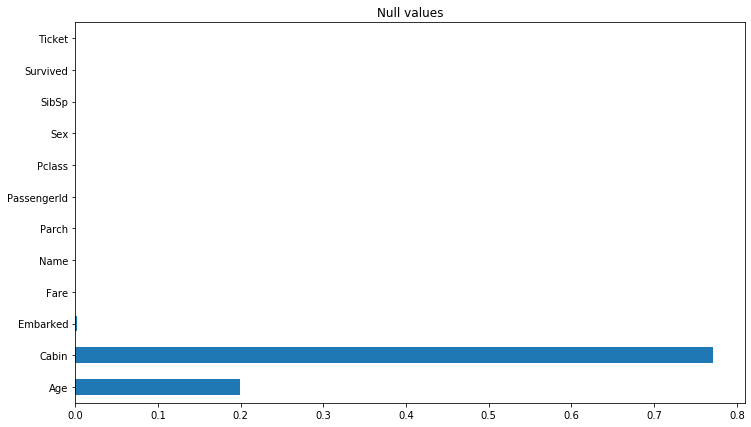

In [53]:
(train_df_raw.isnull().sum().sort_index()/len(train_df_raw)).plot(title='Null values', figsize=(12,7), kind='barh')

In [14]:
train_df, train_y, _ = proc_df(train_df_raw, 'Survived')
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na
0,1,3,109,2,22.0,1,0,524,7.2500,0,3,False
1,2,1,191,1,38.0,1,0,597,71.2833,82,1,False
2,3,3,354,1,26.0,0,0,670,7.9250,0,3,False
3,4,1,273,1,35.0,1,0,50,53.1000,56,3,False
4,5,3,16,2,35.0,0,0,473,8.0500,0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,549,2,27.0,0,0,102,13.0000,0,3,False
887,888,1,304,1,19.0,0,0,15,30.0000,31,3,False
888,889,3,414,1,28.0,1,2,676,23.4500,0,3,True
889,890,1,82,2,26.0,0,0,9,30.0000,61,1,False


In [15]:
X_train, X_valid = train_df[:600], train_df[600:]
y_train, y_valid = train_y[:600], train_y[600:]

In [16]:
model = RandomForestClassifier(n_estimators=3, max_features=0.5, min_samples_leaf=3).fit(X_train, y_train)
print('Training score : \n{}'.format(model.score(train_df, train_y)))

Training score : 
0.8686868686868687


Without splitting the dataset into a train and validation sets

In [17]:
model = RandomForestClassifier(n_jobs=-1).fit(train_df, train_y)
print('Training score : \n{}'.format(model.score(train_df, train_y)))

Training score : 
1.0


In [18]:
model = RandomForestClassifier(n_estimators=100, n_jobs=8, max_features=0.5, min_samples_leaf=1).fit(train_df, train_y)
print('Training score : \n{}'.format(model.score(train_df, train_y)))

Training score : 
1.0


In [19]:
imp_features =rf_feat_importance(model, train_df)
imp_features

,cols,imp
3,Sex,0.273866
7,Ticket,0.121897
2,Name,0.112755
8,Fare,0.107363
4,Age,0.101535
0,PassengerId,0.095812
1,Pclass,0.068704
9,Cabin,0.059246
5,SibSp,0.022714
10,Embarked,0.014873


(<matplotlib.axes._subplots.AxesSubplot at 0x7f5afd0e3390>,)

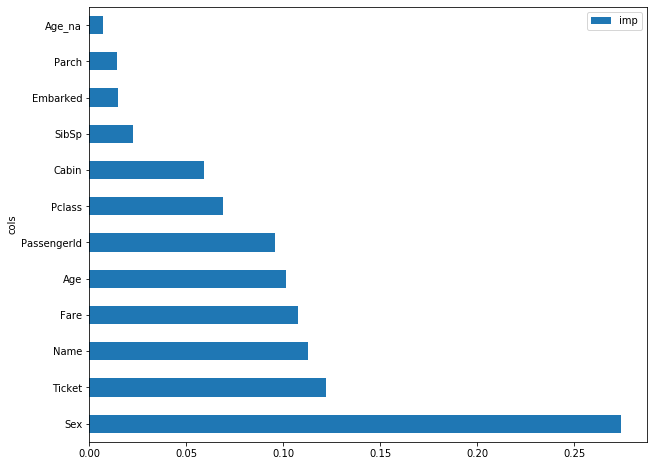

In [20]:
imp_features.plot('cols', 'imp', kind='barh', figsize=(10,8)),

In [21]:
pd.set_option('display.max_columns', len(train_df))
train_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,1

In [22]:
model = RandomForestClassifier(n_estimators=100, n_jobs=8, max_features=0.5, min_samples_leaf=1).fit(train_df, train_y)
prediction = model.predict(test_X)

NameError: name 'test_X' is not defined

In [ ]:
#Predictions
output = pd.DataFrame({'PassengerId': test_df_raw.PassengerId, 'Survived': prediction})
output.to_csv('my_submission.csv', index=False)